In [109]:
import cv2 as cv
import copy
import numpy as np
import matplotlib.pyplot as plt

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
assets_path = '/content/drive/MyDrive/CV_Exercise_Assets/Exercise1_Assets/1.3/'

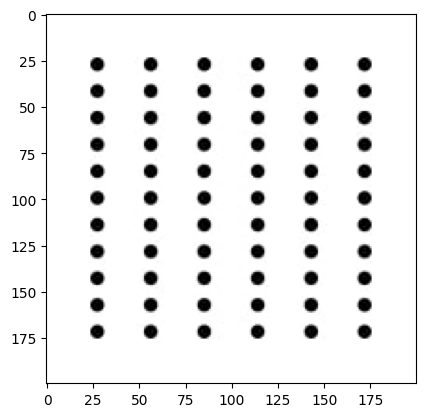

In [112]:
image = cv.imread(assets_path + "2366609-200.jpg", cv.IMREAD_COLOR)
image2 = cv.imread(assets_path + "2366610-200.jpg", cv.IMREAD_COLOR)
imgs = []
imgs.append(image)
imgs.append(image2)
plt.imshow(imgs[0])
plt.show()

In [113]:
# found replacement for cv.findChessboardCorners() from https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html
corners = [cv.findCirclesGrid(i, (6,11)) for i in imgs]
corners2 = copy.deepcopy(corners)

In [114]:
# code from exercise file
# termination criteria (https://docs.opencv.org/3.1.0/dc/dbb/tutorial_py_calibration.html)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.01)
# Cada una de las imagenes la volvemos a blanco y negro
imgs_grey = [cv.cvtColor(img, cv.COLOR_RGB2GRAY) for img in imgs]
# For each image and corners we are going to use cornerSubPix
cornersRefined = [cv.cornerSubPix(i, cor[1], (6, 11), (-1, -1), criteria) if cor[0] else [] for i, cor in zip(imgs_grey, corners2)]
# pp(cornersRefined)

In [115]:
# OPTIONAL => drawChessboardCorners is a destructive function. so we need to copy corners to avoid data loss
imgs2 = copy.deepcopy(imgs)

# We are going to draw the corners if we have found them
tmp = [cv.drawChessboardCorners(img, (6,11), cor[1], cor[0]) for img, cor in zip(imgs, corners) if cor[0]]

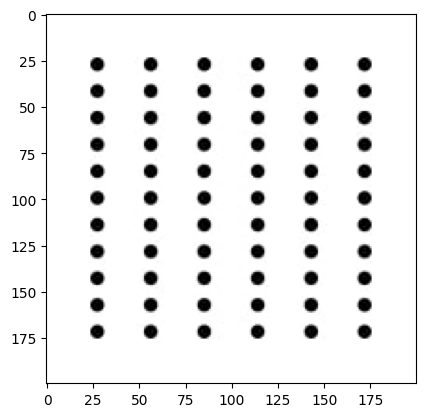

In [116]:
 #Original Image
plt.figure()
plt.imshow(imgs2[0])

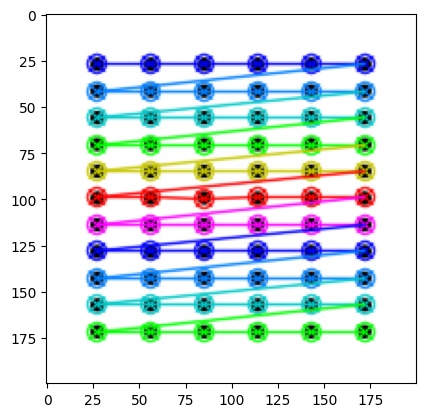

In [117]:
# Image with the corners drawed
plt.figure()
plt.imshow(imgs[0])

In [118]:
def get_chessboard_points(chessboard_shape, dx, dy):
    return [[(i%chessboard_shape[0])*dx, (i//chessboard_shape[0])*dy, 0] for i in range(np.prod(chessboard_shape))]

cb_points = get_chessboard_points((6, 11), 30, 30)
# pp(cb_points)

In [119]:
# We are going to retrieve existing corners (cor[0] == True)
valid_corners = [cor[1] for cor in corners if cor[0]]

num_valid_images = len(valid_corners)

# Matrix with the coordinates of the corners
real_points = get_chessboard_points((6, 11), 30, 30)

# We are going to convert our coordinates list in the reference system to numpy array
object_points = np.asarray([real_points for i in range(num_valid_images)], dtype=np.float32)

# Convert the corners list to array
image_points = np.asarray(valid_corners, dtype=np.float32)

# Calibrate
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv.calibrateCamera(object_points, image_points, imgs[1].shape[0:2], None, None)

# Calculate extrinsecs matrix using Rodigues on each rotation vector addid its translation vector
extrinsics = list(map(lambda rvec, tvec: np.hstack((cv.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))
# Save the calibration file
np.savez('calib_left', intrinsic=intrinsics, extrinsic=extrinsics)

# Lets print some outputs
print("Standard intrinsics:\n",intrinsics)
print("Standard dist_coefs:\n", dist_coeffs)
print("rms:\n", rms)

Standard intrinsics:
 [[2.02401390e+04 0.00000000e+00 6.67657684e+01]
 [0.00000000e+00 1.01191390e+04 6.35086837e+01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Standard dist_coefs:
 [[ 1.46693313e-01 -2.64034764e-03 -1.04126485e-02 -1.45451047e-03
  -1.34959211e-06]]
rms:
 0.029107907863482083
